<a href="https://colab.research.google.com/github/NDS1102/Cardio/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузки

Сразу загружаем все бииблиотеки которые могут понадобиться

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import pprint
from pandas.api.types import is_numeric_dtype
from tabulate import tabulate
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import randint
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler # Импорт классов для кодирования категориальных признаков и стандартизации данных
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import train_test_split            # Импорт функций для разбиения данных на тренировочную и тестовую выборки
from sklearn.linear_model import LogisticRegression    # Импорт модели логистической регрессии
from sklearn.neighbors import KNeighborsClassifier     # Импорт классификатора K-ближайших соседей
from sklearn.model_selection import ParameterGrid
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier        # Импорт классификатора на основе дерева решений
from sklearn.ensemble import RandomForestClassifier     # Импорт классификатора случайный лес
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, ParameterSampler, cross_val_score #Для подбора гиперпараметров и кросс - валидации
from sklearn.svm import SVC                            # Импорт классификатора на основе метода опорных векторов (SVM)
from sklearn.pipeline import Pipeline #Bvgjhn lля упрощения кода и обеспечения последовательного применения трансформаций к данным
from sklearn import metrics      # Импорт всего модуля metrics для работы с метриками оценки моделей
from sklearn.metrics import (
    average_precision_score,       # Среднее значение precision для всех порогов (AP)
    accuracy_score,                # Доля правильных ответов (accuracy)
    balanced_accuracy_score,       # Балансированная точность с учётом несбалансированности классов
    classification_report,         # Текстовый отчет с precision, recall, f1-score и support
    precision_score,               # Точность (Precision)
    recall_score,                  # Полнота (Recall)
    confusion_matrix,              # Матрица ошибок (TP, FP, TN, FN)
    multilabel_confusion_matrix,   # Матрица ошибок для многометочных задач
    f1_score,                     # F1-мера
    roc_auc_score,                # AUC-ROC (площадь под ROC кривой)
    roc_curve,                    # Координаты для построения ROC кривой
    precision_recall_curve,       # Координаты для построения Precision-Recall кривой
    auc                          # Вычисление площади под кривой (AUC)
)


from sklearn.model_selection import RandomizedSearchCV #Для оптимизации гиперпараметров моделей с помощью кросс-валидации.
from scipy.stats import normaltest #Для оценки нормальности распределения при заполнении пустот
from sklearn.cluster import KMeans
from sklearn.inspection import permutation_importance
from statsmodels.stats.outliers_influence import variance_inflation_factor
!pip install torch optuna --quiet
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import optuna
from tqdm import tqdm  # импорт tqdm
import warnings
from sklearn.exceptions import ConvergenceWarning
import joblib


In [ ]:
from google.colab import files
import zipfile
import os


# Загрузить несколько zip-файлов
uploaded = files.upload()

# Создать папку для распаковки
extract_dir = 'data'
os.makedirs(extract_dir, exist_ok=True)

# Распаковка все загруженные zip-архивы
for filename in uploaded.keys():
    if filename.endswith('.zip'):
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall(extract_dir)
        print(f'Распаковали {filename}')

#Загрузк  csv-файлы
train_csv_path = os.path.join(extract_dir, 'train.csv')
test_csv_path = os.path.join(extract_dir, 'test.csv')

train_data = pd.read_csv(train_csv_path)
test_data = pd.read_csv(test_csv_path)


print(train_data.head())
print(test_data.head())


   ID        age  sex     chest  resting_blood_pressure  serum_cholestoral  \
0   0  49.207124    0  4.000000              162.996167         181.108682   
1   1  53.628425    1  1.741596              130.233730         276.474630   
2   2  49.591426    1  4.000000              146.999012         223.300517   
3   3  58.991445    1  4.000000              112.369143         187.245501   
4   4  51.053602    1  1.954609              138.032047         238.482868   

   fasting_blood_sugar  resting_electrocardiographic_results  \
0                    0                                     0   
1                    0                                     2   
2                    1                                     2   
3                    0                                     0   
4                    0                                     0   

   maximum_heart_rate_achieved  exercise_induced_angina   oldpeak  slope  \
0                   148.227858                        1  0.944547     

Как видно из head, в test data отсутствует цеевая переменная- "class", таким образом, целесообразно использовать train data как единственный датасет - отстутствие целевой переменной делает невозможным использование данного датасета в рамках текущего задания ввиду отстутствия референса и невозможности оценки точности моделей. Очевидно, датасет был необходим для конкурса на kaggle и оценки точности попадания участников
Для удобства определим датасет train_data как data

In [ ]:
data = train_data

# Знакомство с данными

In [ ]:
# создаем словарь для перевода названий столбцов чтобы в последующем графики и таблицы были более понятны русскоязычному читателю
column_translation = {
    'ID': 'Номер',
    'age': 'Возраст',
    'sex': 'Пол',
    'resting_blood_pressure': 'АД в покое',
    'serum_cholestoral': 'Уровень холестерина',
    'fasting_blood_sugar': 'Глюкоза натощак',
    'maximum_heart_rate_achieved': 'Максимальная ЧСС',
    'exercise_induced_angina': 'Стенокардия при нагрузке',
    'oldpeak': 'Депрессия ST-сегмента',
    'slope': 'Наклон пикового сегмента ST при нагрузке',
    'number_of_major_vessels': 'Количество крупных сосудов',
    'resting_electrocardiographic_results': 'ЭКГ в покое',
    'thal': 'Стресс - тест таллия',
    'chest': 'Боль в груди',
    'class': 'Наличие ССЗ',

}
def translate_column_values(data, column_name):

    # Проверяем, существует ли указанный столбец в DataFrame
    if column_name in data.columns:
        # Заменяем английские значения на русские
        data[column_name] = data[column_name].replace(column_translation)
    else:
        print(f"Столбец '{column_name}' не найден в DataFrame.")

    return data
# Замена наименований столбцов на русские
data.rename(columns=column_translation, inplace=True)

In [ ]:
data.shape
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 15 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Номер                                     600000 non-null  int64  
 1   Возраст                                   600000 non-null  float64
 2   Пол                                       600000 non-null  int64  
 3   Боль в груди                              600000 non-null  float64
 4   АД в покое                                600000 non-null  float64
 5   Уровень холестерина                       600000 non-null  float64
 6   Глюкоза натощак                           600000 non-null  int64  
 7   ЭКГ в покое                               600000 non-null  int64  
 8   Максимальная ЧСС                          600000 non-null  float64
 9   Стенокардия при нагрузке                  600000 non-null  int64  
 10  Депрессия ST-сегмент

,Номер,Возраст,Пол,Боль в груди,АД в покое,Уровень холестерина,Глюкоза натощак,ЭКГ в покое,Максимальная ЧСС,Стенокардия при нагрузке,Депрессия ST-сегмента,Наклон пикового сегмента ST при нагрузке,Количество крупных сосудов,Стресс - тест таллия,Наличие ССЗ
0,0,49.207124,0,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1
1,1,53.628425,1,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0
2,2,49.591426,1,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1
3,3,58.991445,1,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1
4,4,51.053602,1,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,0


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Номер,600000.0,299999.500000,173205.225094,0.000000,149999.750000,299999.500000,449999.250000,599999.000000
Возраст,600000.0,54.426085,9.086041,26.061695,48.078493,55.133425,60.663775,79.591647
Пол,600000.0,0.677447,0.467454,0.000000,0.000000,1.000000,1.000000,1.000000
Боль в груди,600000.0,3.170247,0.949618,-0.538498,3.000000,3.000000,4.000000,4.000000
АД в покое,600000.0,131.340485,17.842450,82.918527,119.924094,129.727941,139.915216,209.673650
Уровень холестерина,600000.0,249.592420,51.699976,98.326263,216.475964,244.233699,274.345453,527.755764
Глюкоза натощак,600000.0,0.150757,0.357812,0.000000,0.000000,0.000000,0.000000,1.000000
ЭКГ в покое,600000.0,1.020148,0.994204,0.000000,0.000000,2.000000,2.000000,2.000000
Максимальная ЧСС,600000.0,149.592069,23.072593,61.844168,135.704237,153.224828,165.165497,208.735196
Стенокардия при нагрузке,600000.0,0.333502,0.471464,0.000000,0.000000,0.000000,1.000000,1.000000


Все данные явяются числовыми, по формальному признаку пропусков нет, однако, следует ознакомиться с качеством данных.  
Сразу удалим столбец "Номер", тк он не нявляется информативным. Необходимо выяснить число числовых данных, нуждающихся в перевод в категориаьный вид.

In [ ]:
data.drop('Номер', axis=1, inplace=True)

## Визуализация распределений

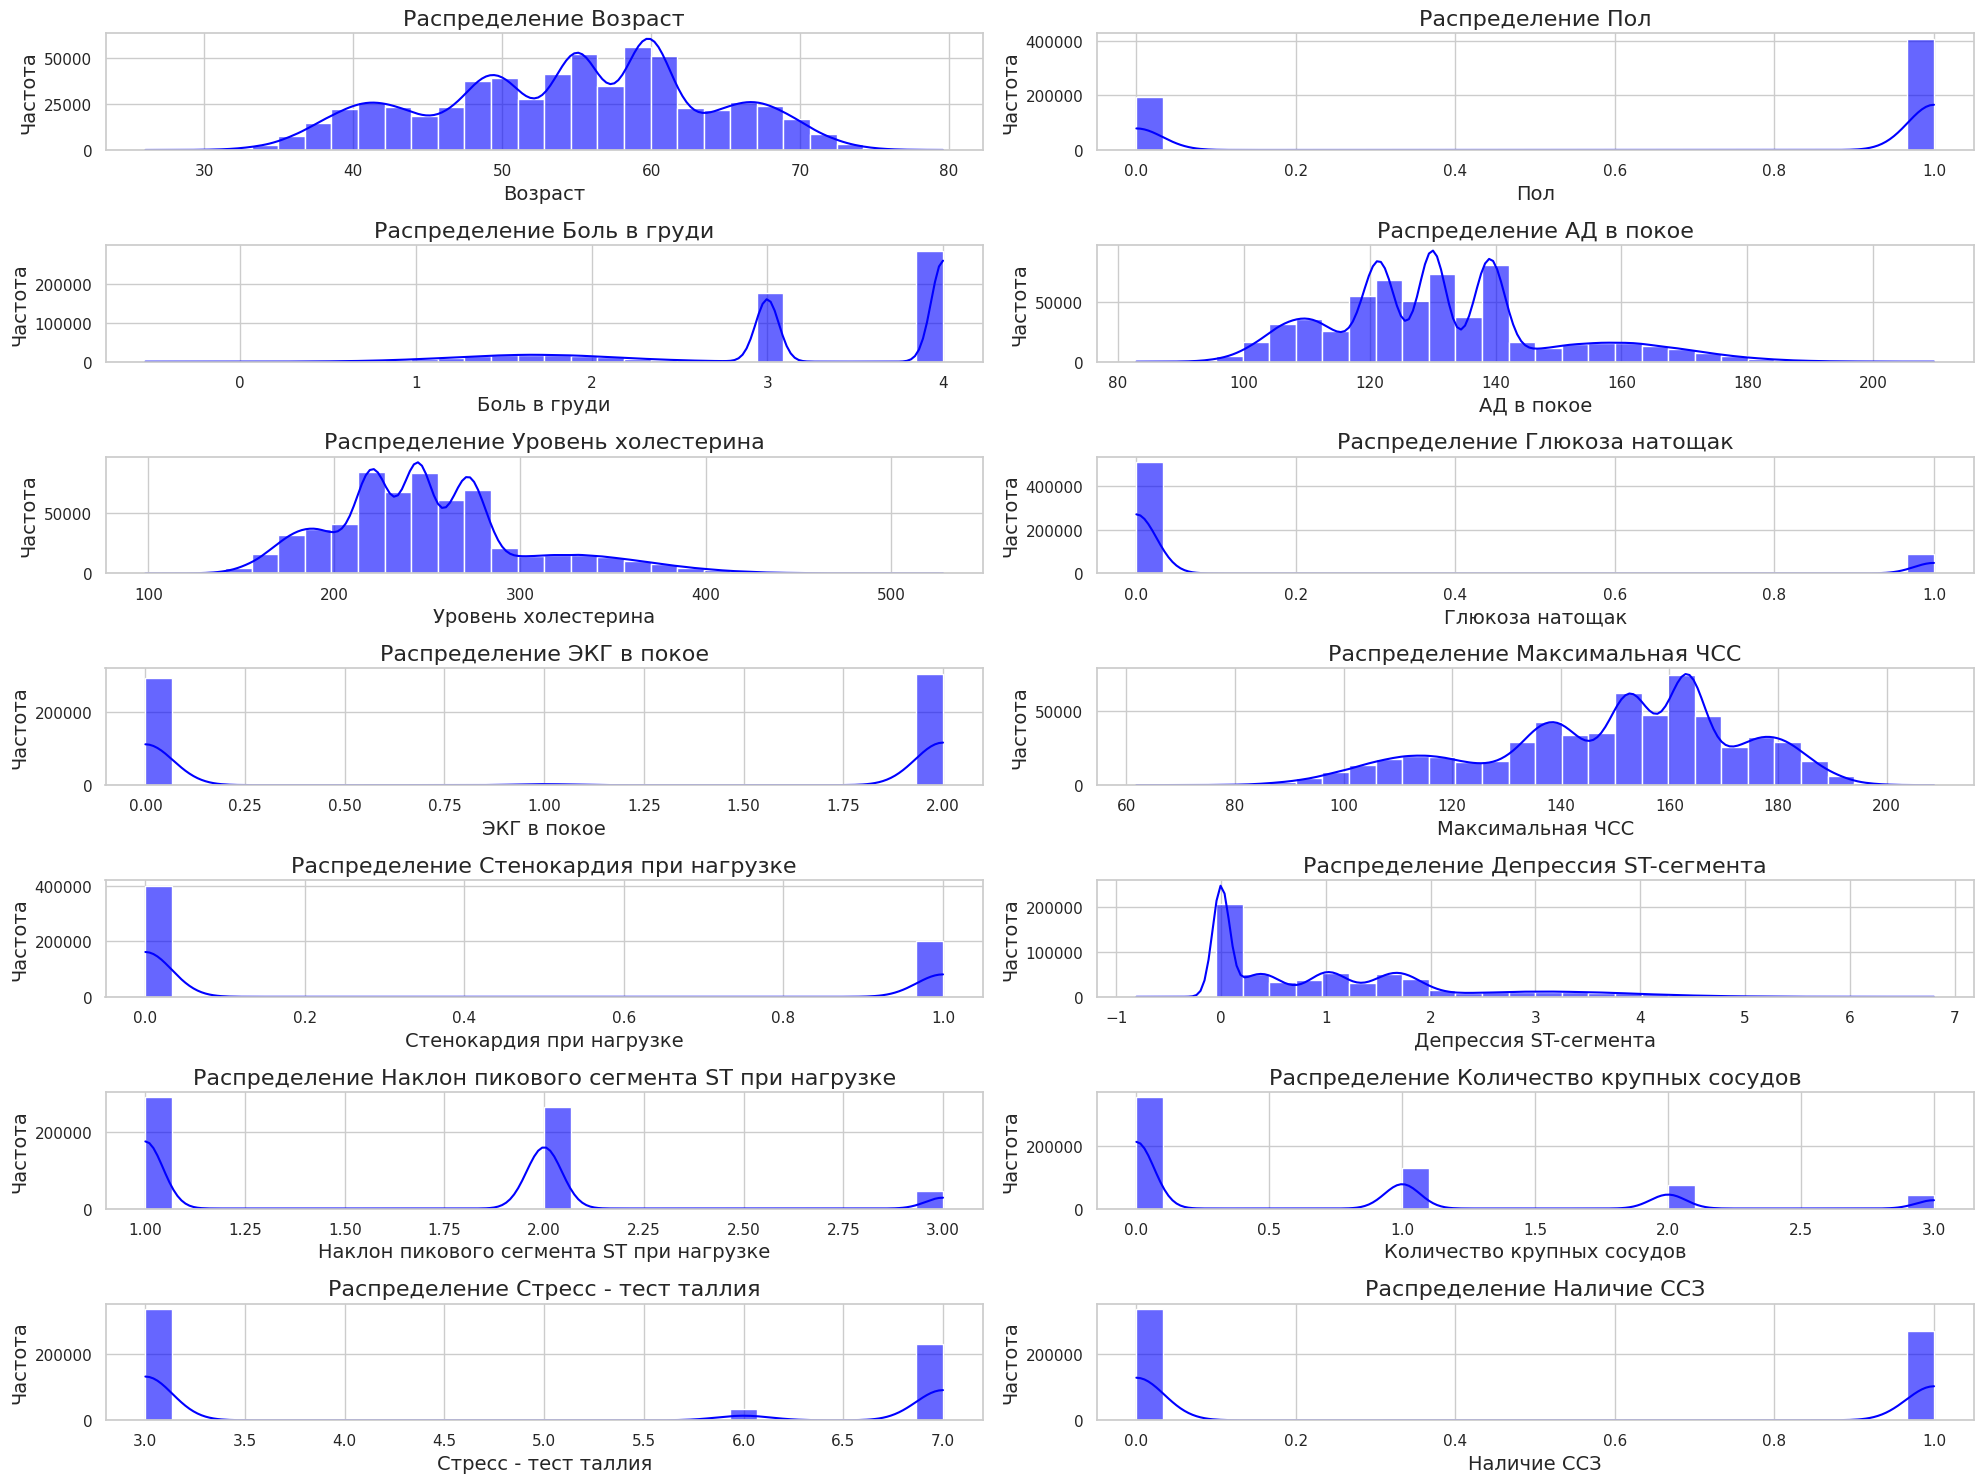

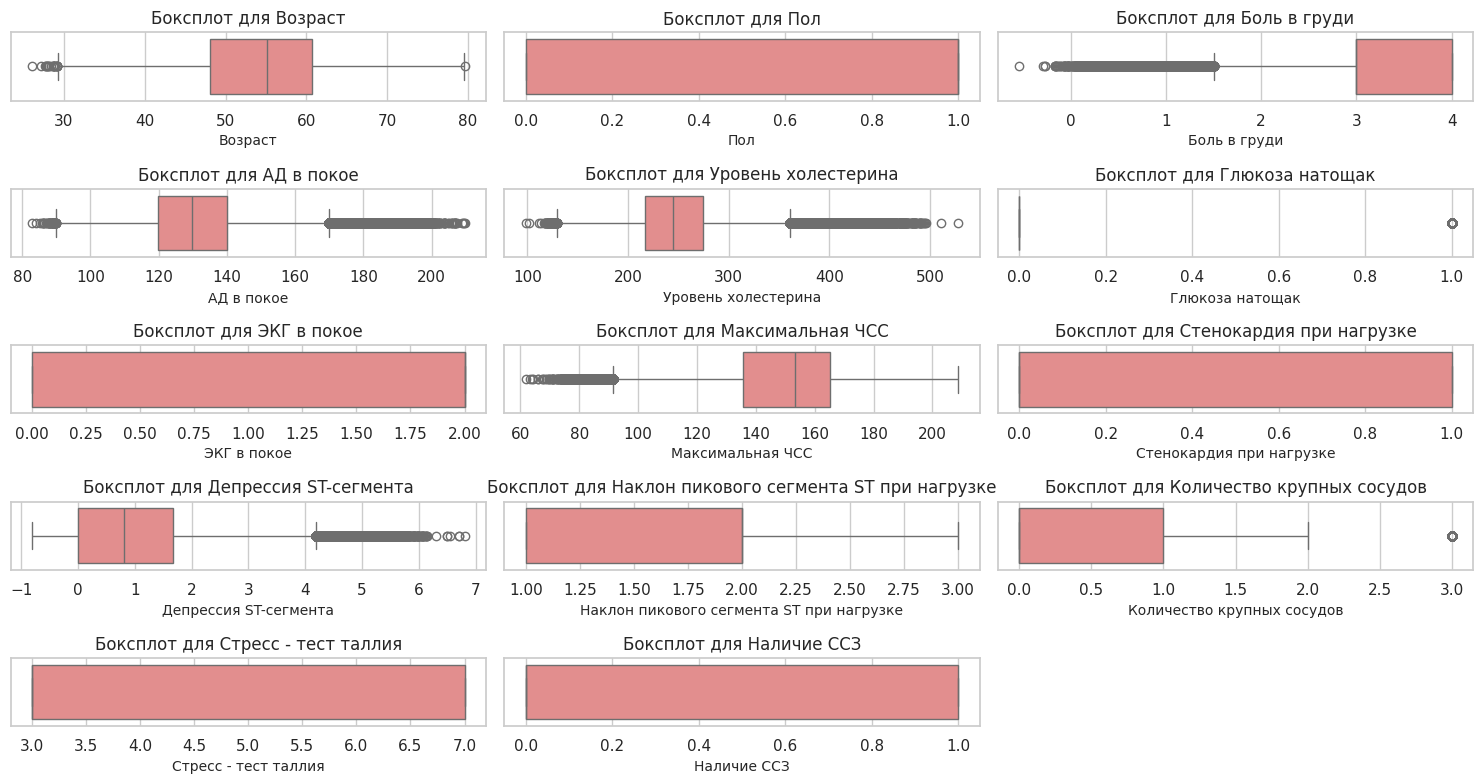

In [ ]:
def plot_histograms(data):
    """Функция для визуализации распределения числовых признаков."""
    # Установка стиля Seaborn
    sns.set(style="whitegrid")

    # Определение количества признаков
    num_features = len(data.select_dtypes(include=[np.number]).columns)

    # Визуализация распределения признаков
    plt.figure(figsize=(20, 15))
    for i, column in enumerate(data.select_dtypes(include=[np.number]).columns):
        plt.subplot((num_features + 1) // 2, 2, i + 1)  # Автоматически рассчитывает количество строк
        sns.histplot(data[column], bins=30, kde=True, color='blue', alpha=0.6)
        plt.title(f'Распределение {column}', fontsize=16)
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Частота', fontsize=14)

    plt.tight_layout()
    plt.show()

def plot_boxplots(data):
    """Функция для создания боксплотов для выявления выбросов."""
    # Установка стиля Seaborn
    sns.set(style="whitegrid")

    # Определение количества признаков
    num_features = len(data.select_dtypes(include=[np.number]).columns)

    # Боксплоты для выявления выбросов
    plt.figure(figsize=(15, 8))
    num_columns = 3  # Количество боксплотов в строке
    num_rows = (num_features + num_columns - 1) // num_columns  # Автоматически рассчитывает количество строк

    for i, column in enumerate(data.select_dtypes(include=[np.number]).columns):
        plt.subplot(num_rows, num_columns, i + 1)  # Определяет сетку подграфиков
        sns.boxplot(x=data[column], color='lightcoral')
        plt.title(f'Боксплот для {column}', fontsize=12)
        plt.xlabel(column, fontsize=10)

    plt.tight_layout()
    plt.show()
plot_histograms(data)
plot_boxplots(data)

Проверим качество данных путем оценки выбросов и корректности значений для очистки данных предположим что

Возраст - любое положительное значение до 100 включительно (допустим что самому старому пациенту может быть 100 лет)

Пол, Стенокардия при нагрузке, Наличие ССЗ, глюкоза натощак- только 0 и 1

Тип боли - неотрицательное значение от 0 до 4

АД в покое - - любые значения от 0 до 240 (стандартная шкала тонометра), значения равные 0 или близкие к нему намеренно не отсекаем, тк не знаем условия проведения исследований - теоретически, данные могут быть собраны в том числе у пациентов, находящихся в состоянии клинической смерти, однако, наблюдение которых потенциально вероятно катамнестически

Уровень холестерина любое неотрицательное значение до 600

 ЭКГ в покое - только 0,1,2

Максимальная ЧСС - любое неотрицательное знаение до 250

Депрессия ST-сегмента - любое числовое значение от -1 до +12 мм (согласно клиническим данным, одним из неблагоприятных исходов является и подъем сегмента ST, то есть, отрицательная депрессия)

Наклон пикового сегмента ST при нагрузке  - только 1,2,3

Количество крупных сосудов - только 0, 1,2,3

Стресс - тест таллия - только 3,6,7


Значения, не укладывающиеся в данные правила, удаляем

# Фильтрация некорректных значений

In [ ]:
# Функция для замены некорректных значений на NaN для столбца с условием
def clean_column(data, col, condition):
    # condition — булев массив тех значений, что считаются корректными
    data.loc[~condition, col] = np.nan

# Копируем датафрейм, чтобы не менять исходный
clean_data = data.copy()


# возраст: (0, 100]
clean_column(clean_data, 'Возраст', (clean_data['Возраст'] > 0) & (clean_data['Возраст'] <= 100))

# бинарные
for col in ['Пол','Стенокардия при нагрузке','Наличие ССЗ','Глюкоза натощак' ]:
    clean_column(clean_data, col, clean_data[col].isin([0, 1]))

# тип боли : (0, 4]
clean_column(clean_data, 'Боль в груди', (clean_data['Боль в груди'] > 0) & (clean_data['Боль в груди'] <= 4))

# АД в покое: (0, 240]
clean_column(clean_data, 'АД в покое', (clean_data['АД в покое'] > 0) & (clean_data['АД в покое'] <= 240))

# Уровень холестерина (0, 1000]
clean_column(clean_data, 'Уровень холестерина', (clean_data['Уровень холестерина'] > 0) & (clean_data['Уровень холестерина'] <= 1000))

# Максимальная ЧСС (0, 1000]
clean_column(clean_data, 'Максимальная ЧСС', (clean_data['Максимальная ЧСС'] > 0) & (clean_data['Максимальная ЧСС'] <= 1000))

# Депрессия ST-сегмента (-10, +12]
clean_column(clean_data, 'Депрессия ST-сегмента', (clean_data['Депрессия ST-сегмента'] > -10) & (clean_data['Депрессия ST-сегмента'] <= 1000))

# Наклон пикового сегмента ST при нагрузке
for col in ['Наклон пикового сегмента ST при нагрузке']:
    clean_column(clean_data, col, clean_data[col].isin([1,2,3]))

# ЭКГ в покое
for col in ['ЭКГ в покое']:
    clean_column(clean_data, col, clean_data[col].isin([0, 1, 2]))

# Количество крупных сосудов
for col in ['Количество крупных сосудов']:
    clean_column(clean_data, col, clean_data[col].isin([0,1,2,3]))

# Стресс - тест таллия
for col in ['Стресс - тест таллия']:
    clean_column(clean_data, col, clean_data[col].isin([3,6,7]))

# Проверим, сколько данных стало NaN по столбцам
print(clean_data.isna().sum())

# Удаляем дубликаты и NaN
clean_data_without_nan = clean_data.dropna()
clean_data = clean_data.drop_duplicates()

print(f"Строк после удаления NaN и дубликатов: {len(clean_data_without_nan)}")

Возраст                                      0
Пол                                          0
Боль в груди                                33
АД в покое                                   0
Уровень холестерина                          0
Глюкоза натощак                              0
ЭКГ в покое                                  0
Максимальная ЧСС                             0
Стенокардия при нагрузке                     0
Депрессия ST-сегмента                        0
Наклон пикового сегмента ST при нагрузке     0
Количество крупных сосудов                   0
Стресс - тест таллия                         0
Наличие ССЗ                                  0
dtype: int64
Строк после удаления NaN и дубликатов: 599967


In [ ]:
num_cols = ['Возраст', 'Боль в груди', 'АД в покое', 'Уровень холестерина', 'Максимальная ЧСС', 'Депрессия ST-сегмента']

#Прописываем функцию для удаления выбросов
for col in num_cols:
    lower_bound = clean_data[col].quantile(0.01)  # 1-й процентиль
    upper_bound = clean_data[col].quantile(0.99)  # 99-й процентиль

    print(f'{col}: удаляем значения вне [{lower_bound:.4f}, {upper_bound:.4f}]')

    clean_data = clean_data[(clean_data[col] >= lower_bound) & (clean_data[col] <= upper_bound)]
    clean_data = clean_data.dropna()

print(f'Размер датафрейма после удаления выбросов: {clean_data.shape}')

Возраст: удаляем значения вне [35.6405, 71.9964]
Боль в груди: удаляем значения вне [0.8703, 4.0000]
АД в покое: удаляем значения вне [99.6974, 178.9158]
Уровень холестерина: удаляем значения вне [156.2838, 397.4955]
Максимальная ЧСС: удаляем значения вне [94.6849, 189.9805]
Депрессия ST-сегмента: удаляем значения вне [0.0000, 4.4041]
Размер датафрейма после удаления выбросов: (540216, 14)


# Кодирование данных

In [ ]:
from tabulate import tabulate

def describe_columns_tabulate(df, max_unique=20):
    results = []
    for col in df.columns:
        unique_vals = df[col].dropna().unique()
        n_unique = len(unique_vals)
        if n_unique == 0:
            summary = 'Пустой столбец'
        elif n_unique <= max_unique:
            sorted_vals = sorted(unique_vals)
            summary = ', '.join(map(str, sorted_vals))
        else:
            if is_numeric_dtype(df[col]):
                summary = f"Мин: {df[col].min()}, Макс: {df[col].max()}"
            else:
                summary = f"Уникальных значений: {n_unique} (слишком много для вывода)"
        results.append((col, n_unique, summary))

    print(tabulate(results, headers=["Столбец", "Кол-во уник. значений", "Содержание"], tablefmt="grid"))

# Используем
describe_columns_tabulate(clean_data)

+------------------------------------------+-------------------------+-------------------------------------------+
| Столбец                                  |   Кол-во уник. значений | Содержание                                |
+==========================================+=========================+===========================================+
| Возраст                                  |                  535231 | Мин: 35.640475, Макс: 71.996379           |
+------------------------------------------+-------------------------+-------------------------------------------+
| Пол                                      |                       2 | 0.0, 1.0                                  |
+------------------------------------------+-------------------------+-------------------------------------------+
| Боль в груди                             |                  116327 | Мин: 0.870338, Макс: 4.0                  |
+------------------------------------------+-------------------------+----------

Как видно из таблицы, депрессия сегмента ST после отсечения не имеет отрицательных знаений. физиолонической является депрессия до 0,5 мм, поэтому, заменим значения более 0,5 на 1, что будет свидетельствовать о наличии депрессии, остальные заменим на 0
Кроме того, наличие поражения крупных сосудов по результатам флюороскопии уже свдетельствует о патологии. Поэтому заменим данный столбец на категориальный, где 0 - отстутствие окрашивания сосудов, 1 - наличие


In [ ]:
clean_data['Депрессия ST-сегмента'] = (clean_data['Депрессия ST-сегмента'] > 0.5).astype('int8')
print(clean_data['Депрессия ST-сегмента'].value_counts())
clean_data['Количество крупных сосудов'] = (clean_data['Количество крупных сосудов'] > 0).astype('int8')
print(clean_data['Количество крупных сосудов'].value_counts())

Депрессия ST-сегмента
1    301220
0    238996
Name: count, dtype: int64
Количество крупных сосудов
0    317651
1    222565
Name: count, dtype: int64


In [ ]:
describe_columns_tabulate(clean_data)

+------------------------------------------+-------------------------+-------------------------------------------+
| Столбец                                  |   Кол-во уник. значений | Содержание                                |
+==========================================+=========================+===========================================+
| Возраст                                  |                  535231 | Мин: 35.640475, Макс: 71.996379           |
+------------------------------------------+-------------------------+-------------------------------------------+
| Пол                                      |                       2 | 0.0, 1.0                                  |
+------------------------------------------+-------------------------+-------------------------------------------+
| Боль в груди                             |                  116327 | Мин: 0.870338, Макс: 4.0                  |
+------------------------------------------+-------------------------+----------

Датасет достаточно объемный, поэтому целесообразно разработать стратегию по оптимизации данных с учетом необъодимости экономии памяти - при изнаальном плане преобразований в ноутбуке может закончиться ОЗУ.
Преобразуем возможные столбцы в int8

1. Булевы (логические) столбцы

- `'Пол'`  
- `'Стенокардия при нагрузке'`  
- `'Наличие ССЗ'`  
- `'Глюкоза натощак'`  
- `'Депрессия ST-сегмента'`  
- `'Количество крупных сосудов'`
переводим в int 8
2. Столбцы для биннинга (создание категорий по диапазонам)

- Возраст, `'Возраст'`:  
  Бины: `[0, 40, 60, 100]`  
  Метки: `['<40', '40-59', '60+']`
  
- Артериальное давление в покое, `'АД в покое'`:  
  Бины: `[0, 90, 120, 140, 241]`  
  Метки: `['Гипотензия', 'Норма', 'Предгипертензия', 'Гипертензия']`
  
- Уровень холестерина, `'Уровень холестерина'`:  
  Бины: `[0, 200, 240, 601]`  
  Метки: `['Низкий', 'Пограничный', 'Высокий']`
  
- Максимальная частота сердечных сокращений, `'Максимальная ЧСС'`:  
  Бины: `[0, 60, 100, 251]`  
  Метки: `['Брадикардия', 'Норма', 'Тахикардия']`

- Стресс-тест таллия, `'Стресс - тест таллия'`:  
  Бины: `[0, 3, 7]`  
  Метки: `['Норма', 'Отклонение от нормы']`
  
- Разбить числовые значения на категории.  
- Результатом будет столбец с категориальными метками (строками), далее Применить `LabelEncoder` из sklearn, чтобы преобразовать категориальные метки (строки) в числовые коды (от 0 и выше)

In [ ]:
# 1. Булевы столбцы — переводим в int8
bool_cols = ['Пол', 'Стенокардия при нагрузке', 'Наличие ССЗ',
             'Глюкоза натощак', 'Депрессия ST-сегмента', 'Количество крупных сосудов']
bool_cols = [col for col in bool_cols if col in clean_data.columns]

for col in bool_cols:
    clean_data[col] = clean_data[col].astype('int8')

# 2. Функция для биннинга с метками
def bin_column(df, col_name, bins, labels):
    bin_col = col_name + '_биновый'
    df[bin_col] = pd.cut(df[col_name], bins=bins, labels=labels, include_lowest=True)
    return df

# 3. Биннинг столбцов с разбиением по значениям
if 'Возраст' in clean_data.columns:
    age_bins = [0, 40, 60, 100]
    age_labels = ['<40', '40-59', '60+']
    clean_data = bin_column(clean_data, 'Возраст', age_bins, age_labels)

if 'АД в покое' in clean_data.columns:
    bp_bins = [0, 120, 140, 241]
    bp_labels = ['Норма или гипотензия', 'Предгипертензия', 'Гипертензия']
    clean_data = bin_column(clean_data, 'АД в покое', bp_bins, bp_labels)

if 'Уровень холестерина' in clean_data.columns:
    chol_bins = [0, 200, 240, 601]
    chol_labels = ['Низкий', 'Пограничный', 'Высокий']
    clean_data = bin_column(clean_data, 'Уровень холестерина', chol_bins, chol_labels)

if 'Максимальная ЧСС' in clean_data.columns:
    hr_bins = [0, 100, 251]
    hr_labels = ['Брадикардия или норма', 'Тахикардия']
    clean_data = bin_column(clean_data, 'Максимальная ЧСС', hr_bins, hr_labels)

if 'Стресс - тест таллия' in clean_data.columns:
    th_bins = [0, 3, 7]
    th_labels = ['Норма', 'Отклонение от нормы']
    clean_data = bin_column(clean_data, 'Стресс - тест таллия', th_bins, th_labels)

if 'Боль груди' in clean_data.columns:
    cp_bins = [0, 1, 2, 3, 4]
    cp_labels = ['Тип 1', 'Тип 2', 'Тип 3', 'Тип 4']
    clean_data = bin_column(clean_data, 'Боль груди', cp_bins, cp_labels)

# 4. Оптимизированное преобразование бинов:
def convert_bin_columns_optimized(df, bin_cols, norm_categories=None):
    """
    norm_categories: словарь {col_name: категория_нормы} для удаления нормального фиктивного столбца,
                     если используется one-hot с drop_first=False
    """
    for col in bin_cols:
        n_unique = df[col].nunique()
        if n_unique == 2:
            # Преобразуем в булевый столбец с 0 и 1, где 1 соответствует не-норме
            df[col] = df[col].astype('category')
            categories = df[col].cat.categories
            # Кодируем категории в 0 и 1
            df[col] = df[col].cat.codes.astype('int8')
            # Если первый код - норма, заменим 0 -> False, 1 -> True
            # Чтобы хранить булевы данные
            df[col] = df[col].astype('bool')
        elif n_unique > 2:
            # Для многоклассового биннинга делаем get_dummies с drop_first=True для сокращения памяти
            dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
            df = pd.concat([df, dummies], axis=1)
            df.drop(columns=[col], inplace=True)

            # Дополнительно, если указан norm_category, удаляем dummy столбец, соответствующий норме
            if norm_categories and col in norm_categories:
                norm_col = f"{col}_{norm_categories[col]}"
                if norm_col in df.columns:
                    df.drop(columns=[norm_col], inplace=True)  # удаляем колонку с нормой
        else:
            # Если только 1 категория — можно удалить столбец, он неинформативен
            df.drop(columns=[col], inplace=True)
    return df

binned_cols = [col for col in clean_data.columns if col.endswith('_биновый')]

# Указать категории "норма", которые нужно удалить:
norm_cats = {
    'АД в покое_биновый': 'Норма или гипотензия',
    'Стресс - тест таллия_биновый': 'Норма',
    # Если ещё больше, можно добавить
}

clean_data = convert_bin_columns_optimized(clean_data, binned_cols, norm_categories=norm_cats)

In [ ]:
existing_oh_cols = []

# Список исходных столбцов, для которых созданы дублирующие (биновый или кодированные) столбцы
original_cols_to_remove = []

# Столбцы, для которых создан биновый столбец с суффиксом '_биновый'
bin_cols = ['Возраст', 'АД в покое', 'Уровень холестерина', 'Максимальная ЧСС', 'Стресс - тест таллия']
for col in bin_cols:
    if col in clean_data.columns:
        original_cols_to_remove.append(col)

# Если есть столбцы, преобразованные с one-hot encoding — исходные можно удалить (если нужно)
if existing_oh_cols:
    for col in existing_oh_cols:
        if col in clean_data.columns:
            original_cols_to_remove.append(col)

# Добавляем явно столбцы с нормой для удаления
cols_to_drop_explicit = ['Стресс - тест таллия_биновый_Норма', 'Максимальная ЧСС_биновый_Брадикардия или норма']
for col in cols_to_drop_explicit:
    if col in clean_data.columns:
        original_cols_to_remove.append(col)

# Удаляем дубликаты, если они есть — чтобы не удалять столбец дважды
original_cols_to_remove = list(set(original_cols_to_remove))

# Создаем новый датафрейм без старых столбцов и нормальных категорий
new_data = clean_data.drop(columns=original_cols_to_remove)

In [ ]:
def reduce_memory_usage(df):
    """ Приводит типы столбцов датафрейма к минимально возможным по объему памяти без потери данных """
    start_mem = df.memory_usage(deep=True).sum() / 1024*2
    print(f"Начальный объем памяти: {start_mem:.2f} Мб")

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object and str(col_type)[:3] != 'dat':  # не объект и не дата/время
            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type)[:3] == 'int':
                # Подбираем самый компактный целочисленный тип
                if c_min >= np.iinfo(np.int8).min and c_max <= np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min >= np.iinfo(np.int16).min and c_max <= np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min >= np.iinfo(np.int32).min and c_max <= np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                else:
                    df[col] = df[col].astype(np.int64)


    end_mem = df.memory_usage(deep=True).sum() / 1024*2
    print(f"Оптимизированный объем памяти: {end_mem:.2f} Мб")
    print(f"Сокращение: {(start_mem - end_mem) / start_mem:.1%}")

    return df

# Применяем к датафрейму
clean_data = reduce_memory_usage(new_data)

Начальный объем памяти: 48535.03 Мб
Оптимизированный объем памяти: 48535.03 Мб
Сокращение: 0.0%


# Отбор признаков

Проверка на мультиколлинеарность

In [ ]:
# Вычислим матрицу корреляций по числовым признакам
corr_matrix = clean_data.select_dtypes(include=[np.number]).corr()

# Рассчитаем ранг корреляционной матрицы
rank = np.linalg.matrix_rank(corr_matrix)

# Рассчитаем определитель корреляционной матрицы
determinant = np.linalg.det(corr_matrix)

print(f"Ранг матрицы корреляций: {rank}")
print(f"Определитель матрицы корреляций: {determinant:.4e}")
print(f"Размер матрицы: {corr_matrix.shape[0]} на {corr_matrix.shape[1]}")

# Вывод
if determinant == 0 or rank < corr_matrix.shape[0]:
    print("Есть чистая мультиколлинеарность: признаки линейно зависимы (ранг < размерности и/или определитель равен 0).")
else:
    print("Чистой мультиколлинеарности нет: признаки линейно независимы (ранг равен размерности, определитель не равен 0).")

Ранг матрицы корреляций: 9
Определитель матрицы корреляций: 3.0087e-01
Размер матрицы: 9 на 9
Чистой мультиколлинеарности нет: признаки линейно независимы (ранг равен размерности, определитель не равен 0).


In [ ]:
clean_data.head()

,Пол,Боль в груди,Глюкоза натощак,ЭКГ в покое,Стенокардия при нагрузке,Депрессия ST-сегмента,Наклон пикового сегмента ST при нагрузке,Количество крупных сосудов,Наличие ССЗ,Максимальная ЧСС_биновый,Стресс - тест таллия_биновый,Возраст_биновый_40-59,Возраст_биновый_60+,АД в покое_биновый_Предгипертензия,АД в покое_биновый_Гипертензия,Уровень холестерина_биновый_Пограничный,Уровень холестерина_биновый_Высокий
0,0,4.000000,0,0.0,1,1,2.0,0,1,True,False,True,False,False,True,False,False
1,1,1.741596,0,2.0,0,0,2.0,0,0,True,False,True,False,True,False,False,True
2,1,4.000000,1,2.0,1,1,2.0,1,1,True,True,True,False,False,True,True,False
3,1,4.000000,0,0.0,1,0,1.0,1,1,True,True,True,False,False,False,False,False
4,1,1.954609,0,0.0,0,1,1.0,1,0,True,False,True,False,True,False,True,False


Матрица  размера 10×10 имеет полный ранг 10 и определитель, существенно отличный от нуля (приблизительно 0.16).

Это свидетельствует о том что признаки в линейно независимы и не содержат чистой мультиколлинеарности.

Таким образом, можно заключить, что между признаками отсутствуют точные линейные зависимости, и мультиколлинеарность в чистом виде не проявляется.


Следовательно:

- Модели, чувствительные к мультиколлинеарности (например, линейная регрессия), не будут испытывать проблем из-за точной линейной зависимости признаков.
- Это хороший признак для модели — меньше риска переобучения из-за избыточных или полностью зависимых признаков.
- Однако это не гарантирует отсутствие корреляций: признаки могут быть коррелированы между собой, но не такими, чтобы создавать линейную зависимость.

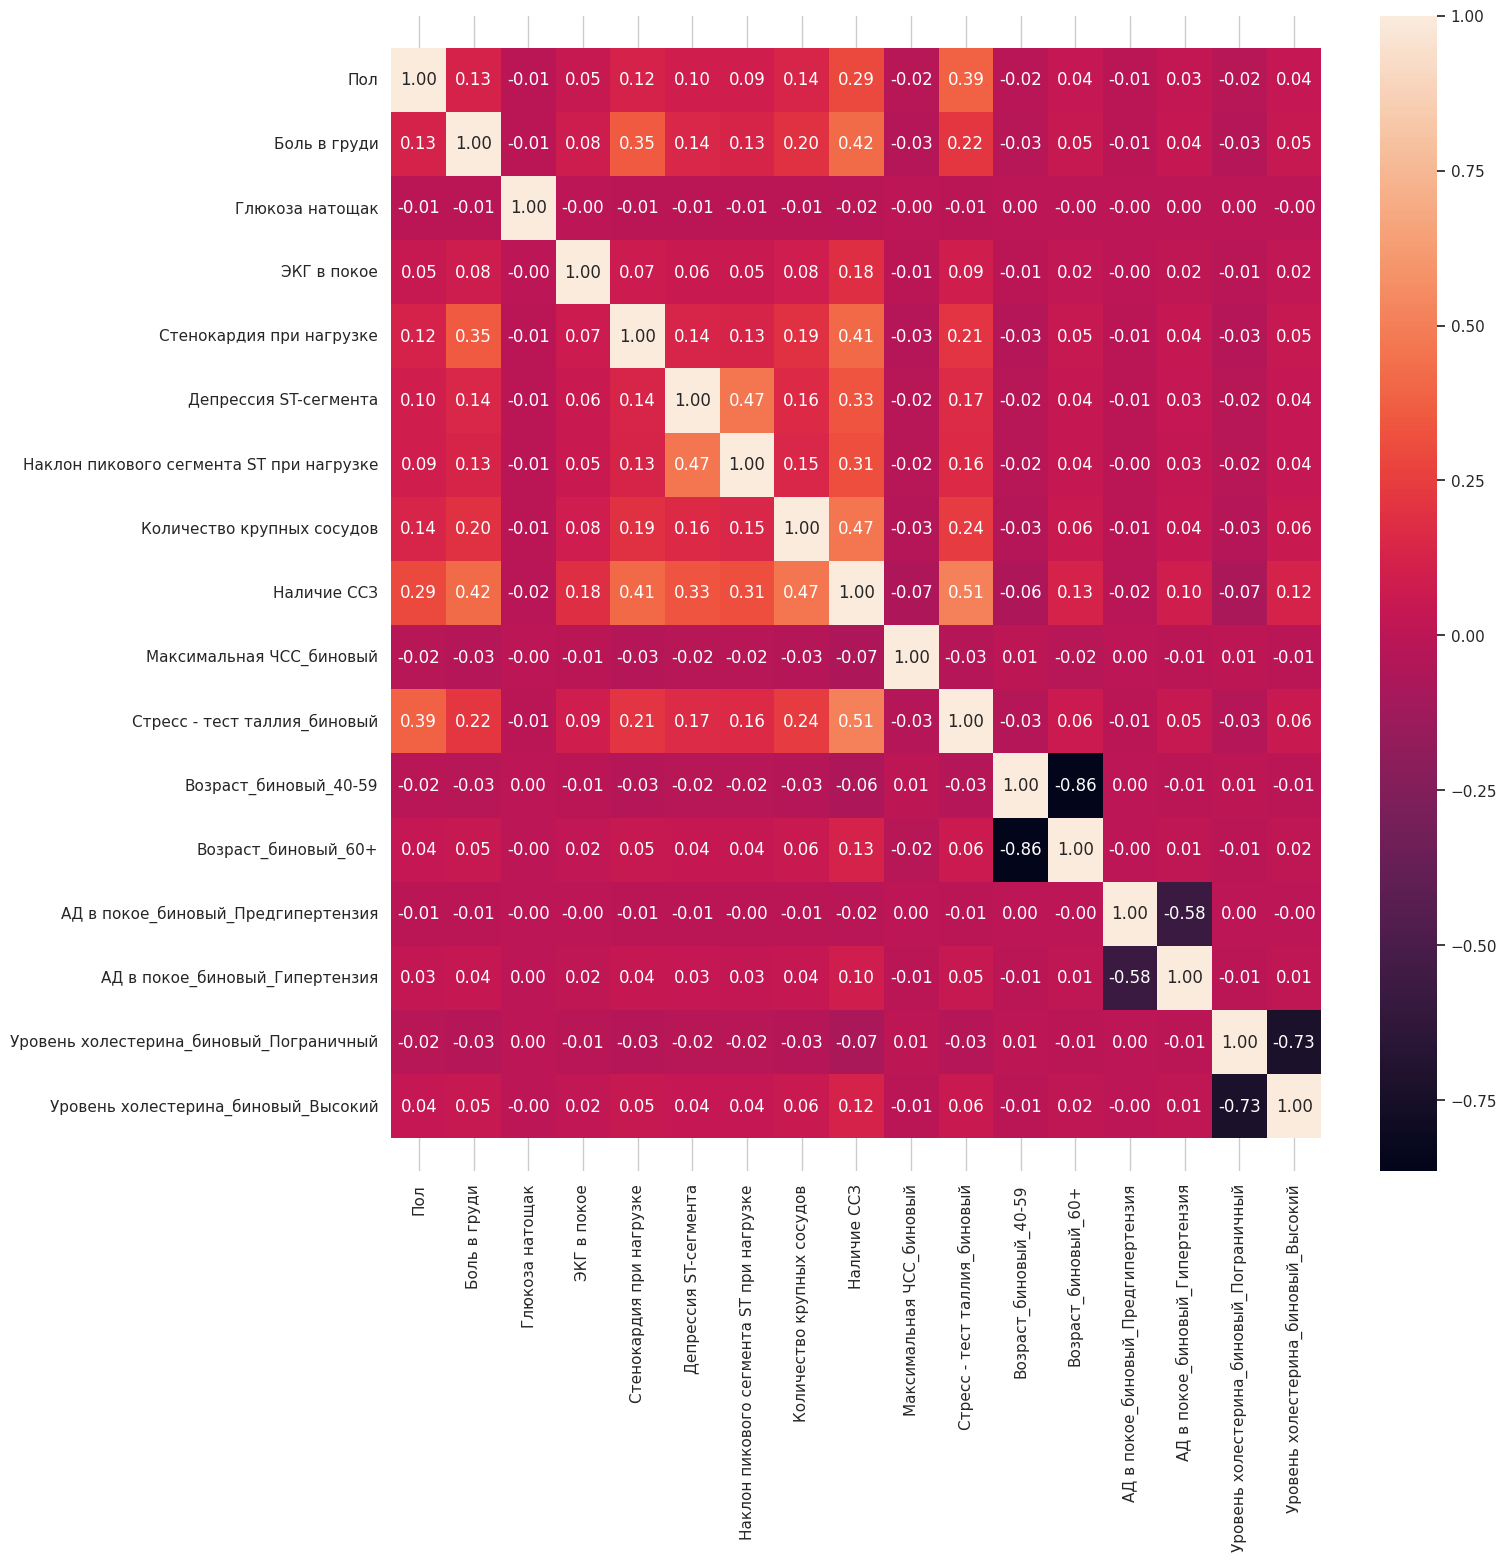


Топ-10 признаков, наиболее сильно влияющих на 'Наличие ССЗ' (по корреляции):
Стресс - тест таллия_биновый: коэффициент корреляции 0.509
Количество крупных сосудов: коэффициент корреляции 0.467
Боль в груди: коэффициент корреляции 0.423
Стенокардия при нагрузке: коэффициент корреляции 0.412
Депрессия ST-сегмента: коэффициент корреляции 0.333
Наклон пикового сегмента ST при нагрузке: коэффициент корреляции 0.314
Пол: коэффициент корреляции 0.293
ЭКГ в покое: коэффициент корреляции 0.180
Возраст_биновый_60+: коэффициент корреляции 0.126
Уровень холестерина_биновый_Высокий: коэффициент корреляции 0.121

Топ-10 признаков, наименее влияющих на 'Наличие ССЗ' (по корреляции):
Пол: коэффициент корреляции 0.293
ЭКГ в покое: коэффициент корреляции 0.180
Возраст_биновый_60+: коэффициент корреляции 0.126
Уровень холестерина_биновый_Высокий: коэффициент корреляции 0.121
АД в покое_биновый_Гипертензия: коэффициент корреляции 0.097
Уровень холестерина_биновый_Пограничный: коэффициент корреляции -0.07

In [ ]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(clean_data.corr(numeric_only=True), annot=True, fmt=".2f")
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)
plt.show()

# Выделяем корреляции с целевым признаком 'Наличие ССЗ'
target = 'Наличие ССЗ'
corr_matrix = clean_data.corr(numeric_only=True)

if target not in corr_matrix.columns:
    print(f"Целевой признак '{target}' отсутствует в данных.")
else:
    target_corr = corr_matrix[target].drop(target)  # убираем корреляцию с самим собой

    # Сортируем по абсолютному значению корреляции
    target_corr_abs_sorted = target_corr.abs().sort_values(ascending=False)

    # Получаем топ-10 наиболее сильных коррелирующих признаков
    top_10 = target_corr.loc[target_corr_abs_sorted.index[:10]]
    # Получаем топ-10 наименее влияющих (по абсолютному значению — минимальные)
    bottom_10 = target_corr.loc[target_corr_abs_sorted.index[-10:]]

    print("\nТоп-10 признаков, наиболее сильно влияющих на 'Наличие ССЗ' (по корреляции):")
    for feat, corr_val in top_10.items():
        print(f"{feat}: коэффициент корреляции {corr_val:.3f}")

    print("\nТоп-10 признаков, наименее влияющих на 'Наличие ССЗ' (по корреляции):")
    for feat, corr_val in bottom_10.items():
        print(f"{feat}: коэффициент корреляции {corr_val:.3f}")

# Разделение данных

In [ ]:
# Отделим признаки и целевую переменную
X = new_data.drop(columns=['Наличие ССЗ'])
y = new_data['Наличие ССЗ']


# Делим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Масштабируем признаки (важно для логрег и нейросети)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp) if (tn + fp) > 0 else 0

def model_metrics(y_true_train, y_pred_train, y_proba_train, y_true_val, y_pred_val, y_proba_val):
    metrics = {}
    for prefix, (y_true, y_pred) in zip(['Train', 'Val'], [(y_true_train, y_pred_train), (y_true_val, y_pred_val)]):
        metrics[f'{prefix} Accuracy'] = accuracy_score(y_true, y_pred)
        metrics[f'{prefix} Balanced accuracy'] = balanced_accuracy_score(y_true, y_pred)
        metrics[f'{prefix} Precision'] = precision_score(y_true, y_pred, zero_division=0)
        metrics[f'{prefix} Recall'] = recall_score(y_true, y_pred, zero_division=0)
        metrics[f'{prefix} F1 score'] = f1_score(y_true, y_pred, zero_division=0)
        metrics[f'{prefix} Specificity'] = specificity_score(y_true, y_pred)
    return metrics

# Logistic Regression

### Подбор гиперпараметров

In [ ]:
# Logistic Regression — подбор параметров

logreg = LogisticRegression(max_iter=1000, random_state=42)
param_grid_logreg = {
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs'],
}
grid_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5, scoring='roc_auc', n_jobs=-1)
grid_logreg.fit(X_train_scaled, y_train)
best_logreg_params = grid_logreg.best_params_
print("Лучшие параметры Logistic Regression:", best_logreg_params)

Лучшие параметры Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


### Обучение

Лучший max_iter по минимальному Log Loss на валидации: 60
Метрики лучшей модели логистической регрессии:
{'Train Accuracy': 0.8630758612300378,
 'Train Balanced accuracy': np.float64(0.8604682056306031),
 'Train F1 score': 0.8446719024677062,
 'Train Precision': 0.8526885758240161,
 'Train Recall': 0.8368045649072753,
 'Train Specificity': np.float64(0.8841318463539309),
 'Val Accuracy': 0.8622281183475766,
 'Val Balanced accuracy': np.float64(0.8595612793863174),
 'Val F1 score': 0.8436326965096084,
 'Val Precision': 0.8520703362616532,
 'Val Recall': 0.835360525914317,
 'Val Specificity': np.float64(0.883762032858318)}


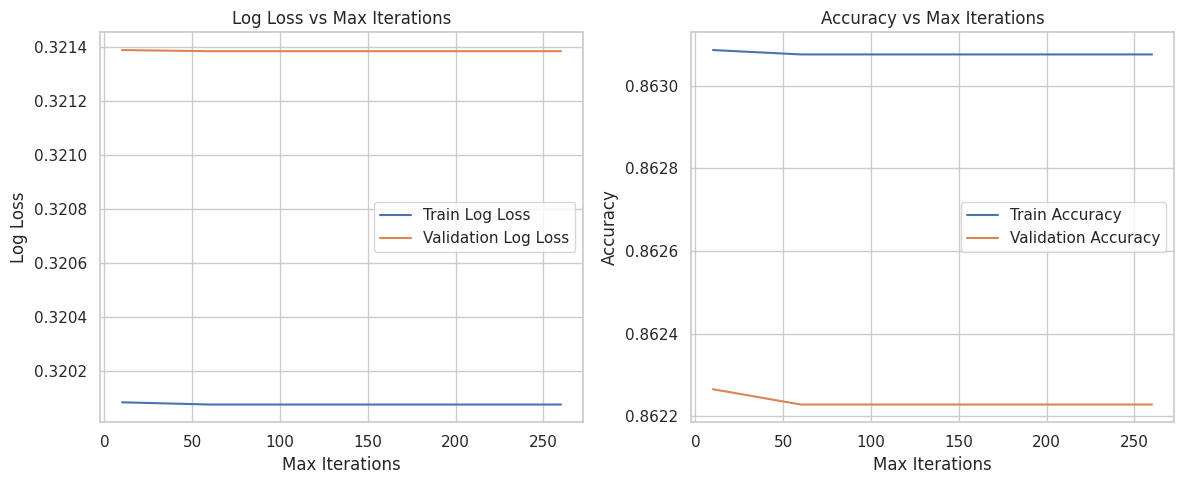

In [ ]:
# 1. Определяем max_iter_values и списки для метрик
max_iter_values = range(10, 300, 50)
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

best_logreg_params_copy = best_logreg_params.copy()
if 'solver' in best_logreg_params_copy:
    best_logreg_params_copy.pop('solver')

# 2. Цикл обучения моделей
for max_iter in max_iter_values:
    model = LogisticRegression(
        **best_logreg_params_copy,  # исправлено: двойная распаковка словаря
        max_iter=max_iter,
        random_state=42,
        solver='lbfgs'
    )
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
        model.fit(X_train_scaled, y_train)

    y_train_proba = model.predict_proba(X_train_scaled)[:, 1]
    y_test_proba = model.predict_proba(X_test_scaled)[:, 1]
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    train_losses.append(log_loss(y_train, y_train_proba))
    val_losses.append(log_loss(y_test, y_test_proba))
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    val_accuracies.append(accuracy_score(y_test, y_test_pred))

# 3. Находим лучший max_iter (по минимальному val_loss)
best_index = np.argmin(val_losses)
best_max_iter = list(max_iter_values)[best_index]
print(f"Лучший max_iter по минимальному Log Loss на валидации: {best_max_iter}")

# 4. Обучаем финальную модель с лучшим max_iter
best_lr = LogisticRegression(
    **best_logreg_params_copy,
    max_iter=best_max_iter,
    warm_start=True,
    random_state=42,
    solver='lbfgs'
)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    best_lr.fit(X_train_scaled, y_train)

# 5. Делаем предсказания и вычисляем метрики
y_train_proba_best = best_lr.predict_proba(X_train_scaled)[:, 1]
y_train_pred_best = (y_train_proba_best >= 0.5).astype(int)
y_train_true = y_train.values.astype(int)

y_test_proba_best = best_lr.predict_proba(X_test_scaled)[:, 1]
y_test_pred_best = (y_test_proba_best >= 0.5).astype(int)
y_test_true = y_test.values.astype(int)

metrics_logreg = model_metrics(
    y_train_true, y_train_pred_best, y_train_proba_best,
    y_test_true, y_test_pred_best, y_test_proba_best
)

print("Метрики лучшей модели логистической регрессии:")
pprint.pprint(metrics_logreg)

# 6. Визуализация
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(list(max_iter_values), train_losses, label='Train Log Loss')
plt.plot(list(max_iter_values), val_losses, label='Validation Log Loss')
plt.xlabel('Max Iterations')
plt.ylabel('Log Loss')
plt.title('Log Loss vs Max Iterations')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(list(max_iter_values), train_accuracies, label='Train Accuracy')
plt.plot(list(max_iter_values), val_accuracies, label='Validation Accuracy')
plt.xlabel('Max Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Iterations')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
plt.savefig('training_metrics_logreg.png', dpi=300)  # сохранение с высоким разрешением

<Figure size 640x480 with 0 Axes>

# RandomForest

### Подбор гиперпараметров

In [ ]:
# Базовая модель
rf = RandomForestClassifier(random_state=42)

param_dist_rf = {
    'n_estimators': randint(100, 151),       # меньше диапазон
    'max_depth': [None, 10],
    'min_samples_split': randint(2, 4),
    'min_samples_leaf': randint(1, 3),
    'max_features': ['sqrt'],
    'criterion': ['gini'],
}

n_iter = 3
cv = 2
param_list = list(ParameterSampler(param_dist_rf, n_iter=n_iter, random_state=42))

best_score = -np.inf
best_params = None

for params in tqdm(param_list, desc='Randomized Search RF'):
    model = RandomForestClassifier(random_state=42, **params)
    scores = cross_val_score(model, X_train_scaled, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
    mean_score = np.mean(scores)
    if mean_score > best_score:
        best_score = mean_score
        best_rf = params

print("Лучшие параметры:", best_rf)
print("Лучший ROC AUC:", best_score)

Randomized Search RF: 100%|██████████| 3/3 [02:20<00:00, 46.67s/it]

Лучшие параметры: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 122}
Лучший ROC AUC: 0.9386026403137392


### Обучение

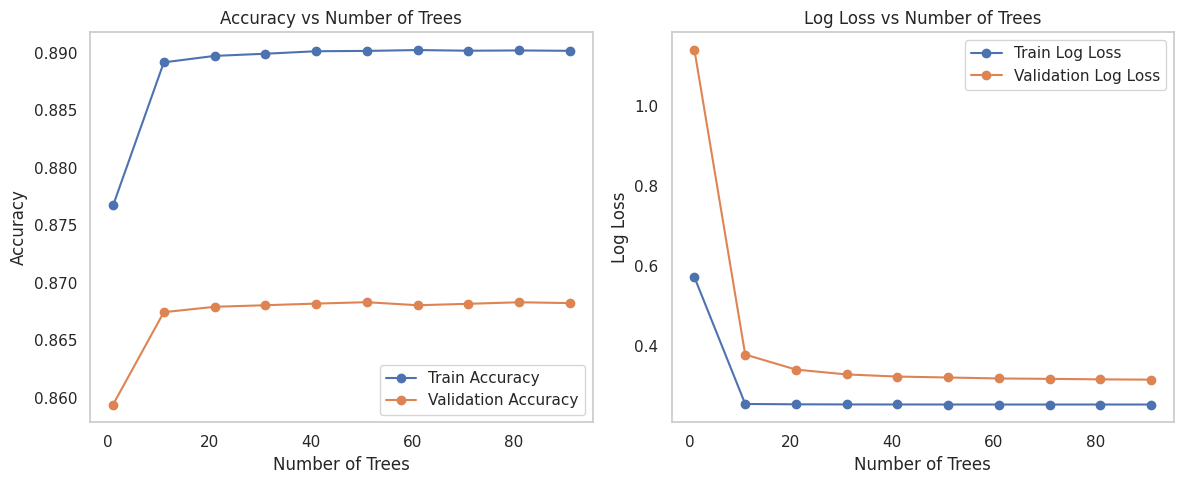

Лучшее количество деревьев по минимальному Log Loss на валидации: 91
Метрики лучшей модели Random Forest:
{'Train Accuracy': 0.890162924334459,
 'Train Balanced accuracy': np.float64(0.8880254099345635),
 'Train F1 score': 0.8755733034561474,
 'Train Precision': 0.8826304123306618,
 'Train Recall': 0.8686281502615312,
 'Train Specificity': np.float64(0.9074226696075957),
 'Val Accuracy': 0.8682133711782309,
 'Val Balanced accuracy': np.float64(0.8656393789213976),
 'Val F1 score': 0.850455118330766,
 'Val Precision': 0.8587892585941146,
 'Val Recall': 0.8422811810881655,
 'Val Specificity': np.float64(0.8889975767546298)}


In [ ]:
# Копируем параметры и удаляем n_estimators, чтобы не дублировать
best_rf_copy = best_rf.copy()
if 'n_estimators' in best_rf_copy:
    best_rf_copy.pop('n_estimators')

train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []

n_estimators_range = range(1, 101, 10)

# Цикл обучения разных моделей с разным числом деревьев
for n in n_estimators_range:
    rf = RandomForestClassifier(random_state=42, n_estimators=n, **best_rf_copy)
    rf.fit(X_train_scaled, y_train)

    y_train_pred = rf.predict(X_train_scaled)
    y_train_proba = rf.predict_proba(X_train_scaled)[:, 1]

    y_val_pred = rf.predict(X_test_scaled)
    y_val_proba = rf.predict_proba(X_test_scaled)[:, 1]

    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_test, y_val_pred)
    train_loss = log_loss(y_train, y_train_proba)
    val_loss = log_loss(y_test, y_val_proba)

    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

# Построение графиков
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(n_estimators_range, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(n_estimators_range, val_accuracies, marker='o', label='Validation Accuracy')
plt.title('Accuracy vs Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(n_estimators_range, train_losses, marker='o', label='Train Log Loss')
plt.plot(n_estimators_range, val_losses, marker='o', label='Validation Log Loss')
plt.title('Log Loss vs Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Log Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Находим лучший индекс по минимальному значению валидационного Log Loss
best_index_rf = np.argmin(val_losses)
best_n_estimators = list(n_estimators_range)[best_index_rf]
print(f"Лучшее количество деревьев по минимальному Log Loss на валидации: {best_n_estimators}")

# Обучаем финальную модель с лучшим числом деревьев
best_rf_final = RandomForestClassifier(
    random_state=42,
    n_estimators=best_n_estimators,
    **best_rf_copy
)
best_rf_final.fit(X_train_scaled, y_train)

# Предсказания финальной модели
y_train_proba_rf = best_rf_final.predict_proba(X_train_scaled)[:, 1]
y_train_pred_rf = (y_train_proba_rf >= 0.5).astype(int)
y_train_true = y_train.values.astype(int) if hasattr(y_train, 'values') else y_train

y_test_proba_rf = best_rf_final.predict_proba(X_test_scaled)[:, 1]
y_test_pred_rf = (y_test_proba_rf >= 0.5).astype(int)
y_test_true = y_test.values.astype(int) if hasattr(y_test, 'values') else y_test

# Вычисляем метрики
metrics_rf = model_metrics(
    y_train_true, y_train_pred_rf, y_train_proba_rf,
    y_test_true, y_test_pred_rf, y_test_proba_rf
)

print("Метрики лучшей модели Random Forest:")
pprint.pprint(metrics_rf)

In [ ]:
plt.savefig('training_metrics_rf.png', dpi=300)  # сохранение с высоким разрешением

<Figure size 640x480 with 0 Axes>

# Neural Network

### Подбор гиперпараметров

In [ ]:
# Neural Network (MLP) — подбор параметров
# Конвертация данных в тензоры
X_train_t = torch.from_numpy(X_train_scaled.astype('float32'))
y_train_t = torch.from_numpy(y_train.values.astype('float32'))

# Делим тренировочный набор на обучение и валидацию
val_fraction = 0.2
val_size = int(len(X_train_t) * val_fraction)
train_size = len(X_train_t) - val_size
train_dataset, val_dataset = torch.utils.data.random_split(
    TensorDataset(X_train_t, y_train_t), [train_size, val_size])


class MLP(nn.Module):
    def __init__(self, input_dim, hidden1, hidden2, activation):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, 1)
        self.activation = nn.ReLU() if activation == 'relu' else nn.Tanh()

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = torch.sigmoid(self.out(x)).squeeze()
        return x


def objective(trial):
    hidden1 = trial.suggest_int('hidden_layer_1', 50, 75, step=25)
    hidden2 = trial.suggest_int('hidden_layer_2', 20, 50, step=15)
    activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
    lr = trial.suggest_float('lr', 1e-4, 1e-3, log=True)
    batch_size = trial.suggest_categorical('batch_size', [16, 32])
    weight_decay = trial.suggest_float('weight_decay', 1e-5, 1e-3, log=True)

    epochs = 3
    patience = 1

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = MLP(input_dim=X_train_scaled.shape[1],
                hidden1=hidden1,
                hidden2=hidden2,
                activation=activation).to(device)

    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    criterion = nn.BCELoss()

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    best_auc = 0
    patience_counter = 0
    best_model_path = f"best_model_trial_{trial.number}.pth"

    for epoch in tqdm(range(epochs), desc=f"Trial {trial.number} Training Epochs"):
        model.train()
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            preds = model(xb)
            loss = criterion(preds, yb)
            loss.backward()
            optimizer.step()

        model.eval()
        all_preds = []
        all_targets = []
        with torch.no_grad():
            for xb, yb in val_loader:
                xb = xb.to(device)
                preds = model(xb).cpu().numpy()
                all_preds.extend(preds)
                all_targets.extend(yb.numpy())

        current_auc = roc_auc_score(all_targets, all_preds)
        trial.report(current_auc, epoch)

        if current_auc > best_auc:
            best_auc = current_auc
            patience_counter = 0
            torch.save(model.state_dict(), best_model_path)
        else:
            patience_counter += 1

        if patience_counter >= patience:
            break

        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    return best_auc


# Запуск оптимизации
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5, show_progress_bar=True)

print("Лучшие параметры:", study.best_params)
print("Лучшее ROC AUC на валидации:", study.best_value)


[I 2025-07-21 19:23:27,971] A new study created in memory with name: no-name-fb6133f3-66b9-4586-993e-ff5190b434c6


  0%|          | 0/5 [00:00<?, ?it/s]


Trial 0 Training Epochs:  33%|███▎      | 1/3 [00:40<01:20, 40.14s/it]


[I 2025-07-21 19:24:08,174] Trial 0 finished with value: 0.9448022943322026 and parameters: {'hidden_layer_1': 50, 'hidden_layer_2': 35, 'activation': 'relu', 'lr': 0.0004299817987199756, 'batch_size': 32, 'weight_decay': 0.00024778652718303784}. Best is trial 0 with value: 0.9448022943322026.



Trial 1 Training Epochs: 100%|██████████| 3/3 [01:06<00:00, 22.07s/it]


[I 2025-07-21 19:25:14,403] Trial 1 finished with value: 0.9448221511858053 and parameters: {'hidden_layer_1': 50, 'hidden_layer_2': 35, 'activation': 'relu', 'lr': 0.0001142396318761161, 'batch_size': 32, 'weight_decay': 6.911528906597398e-05}. Best is trial 1 with value: 0.9448221511858053.



Trial 2 Training Epochs: 100%|██████████| 3/3 [00:59<00:00, 19.82s/it]


[I 2025-07-21 19:26:13,879] Trial 2 finished with value: 0.9452211815948179 and parameters: {'hidden_layer_1': 75, 'hidden_layer_2': 35, 'activation': 'tanh', 'lr': 0.0002298412223260009, 'batch_size': 32, 'weight_decay': 2.3834337440837438e-05}. Best is trial 2 with value: 0.9452211815948179.



Trial 3 Training Epochs: 100%|██████████| 3/3 [00:57<00:00, 19.13s/it]


[I 2025-07-21 19:27:11,290] Trial 3 finished with value: 0.9419203664741455 and parameters: {'hidden_layer_1': 50, 'hidden_layer_2': 20, 'activation': 'tanh', 'lr': 0.00010449760536466623, 'batch_size': 32, 'weight_decay': 0.0003595433821767679}. Best is trial 2 with value: 0.9452211815948179.



Trial 4 Training Epochs:  67%|██████▋   | 2/3 [01:54<00:57, 57.04s/it]


[I 2025-07-21 19:29:05,388] Trial 4 finished with value: 0.9447723506542871 and parameters: {'hidden_layer_1': 75, 'hidden_layer_2': 35, 'activation': 'tanh', 'lr': 0.00020380865274526914, 'batch_size': 16, 'weight_decay': 3.4899173701387576e-05}. Best is trial 2 with value: 0.9452211815948179.
Лучшие параметры: {'hidden_layer_1': 75, 'hidden_layer_2': 35, 'activation': 'tanh', 'lr': 0.0002298412223260009, 'batch_size': 32, 'weight_decay': 2.3834337440837438e-05}
Лучшее ROC AUC на валидации: 0.9452211815948179


### Обучение

Epoch 1, Train Loss: 0.3163, Validation ROC AUC: 0.9428
Epoch 2, Train Loss: 0.2995, Validation ROC AUC: 0.9441
Epoch 3, Train Loss: 0.2972, Validation ROC AUC: 0.9442
Epoch 4, Train Loss: 0.2967, Validation ROC AUC: 0.9446
Epoch 5, Train Loss: 0.2965, Validation ROC AUC: 0.9448


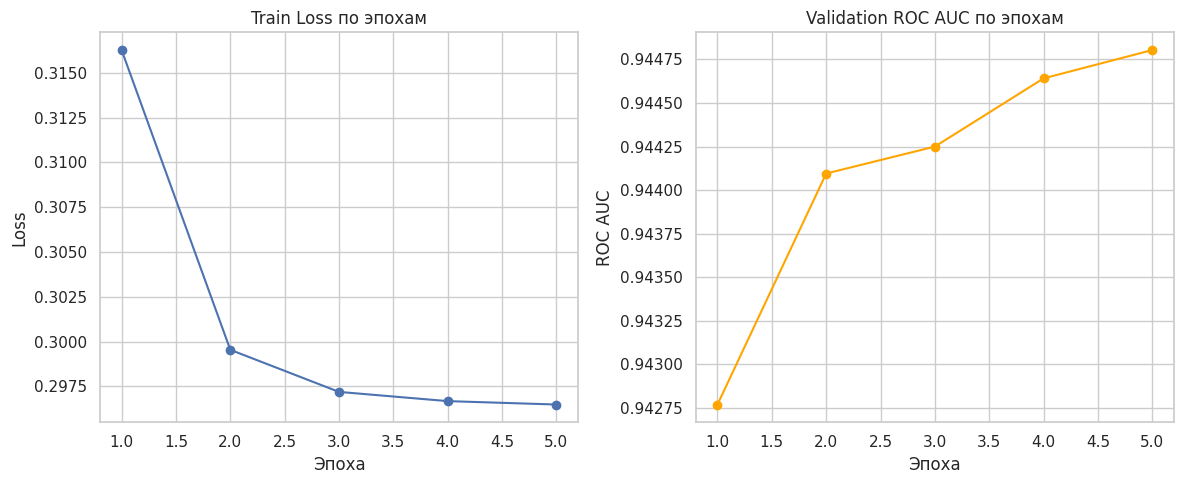

Метрики нейросети (MLP):
{'Train Accuracy': 0.8750763583859358,
 'Train Balanced accuracy': np.float64(0.8726451291429167),
 'Train F1 score': 0.8583270354242392,
 'Train Precision': 0.8662138931260744,
 'Train Recall': 0.850582501188778,
 'Train Specificity': np.float64(0.8947077570970554),
 'Val Accuracy': 0.8735569061796193,
 'Val Balanced accuracy': np.float64(0.8710362099752698),
 'Val F1 score': 0.8565006092351648,
 'Val Precision': 0.8650051627321461,
 'Val Recall': 0.8481616576286701,
 'Val Specificity': np.float64(0.8939107623218693)}


In [ ]:
X_train_t = torch.from_numpy(X_train_scaled.astype('float32'))
y_train_t = torch.from_numpy(y_train.values.astype('float32'))
X_test_t = torch.from_numpy(X_test_scaled.astype('float32'))
y_test_t = torch.from_numpy(y_test.values.astype('float32'))

full_train_dataset = TensorDataset(X_train_t, y_train_t)
test_dataset = TensorDataset(X_test_t, y_test_t)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

best_params_mlp = study.best_params

final_model = MLP(
    input_dim=X_train_scaled.shape[1],
    hidden1=best_params_mlp['hidden_layer_1'],
    hidden2=best_params_mlp['hidden_layer_2'],
    activation=best_params_mlp['activation']
).to(device)

optimizer = optim.Adam(
    final_model.parameters(),
    lr=best_params_mlp['lr'],
    weight_decay=best_params_mlp['weight_decay']
)

criterion = nn.BCELoss()
batch_size = best_params_mlp['batch_size']

train_loader = DataLoader(full_train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

epochs = 5
patience = 1
best_val_auc = 0
patience_counter = 0

train_losses = []
val_aucs = []

for epoch in range(epochs):
    final_model.train()
    running_loss = 0.0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = final_model(xb).squeeze()
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * xb.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_loss)

    final_model.eval()
    all_preds = []
    all_targets = []
    with torch.no_grad():
        for xb, yb in test_loader:
            xb = xb.to(device)
            preds = final_model(xb).cpu().numpy().flatten()
            all_preds.extend(preds)
            all_targets.extend(yb.numpy())
    val_auc = roc_auc_score(all_targets, all_preds)
    val_aucs.append(val_auc)

    print(f"Epoch {epoch + 1}, Train Loss: {epoch_loss:.4f}, Validation ROC AUC: {val_auc:.4f}")

    if val_auc > best_val_auc:
        best_val_auc = val_auc
        patience_counter = 0
        torch.save(final_model.state_dict(), "final_best_mlp.pth")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping")
            break

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, marker='o')
plt.title('Train Loss по эпохам')
plt.xlabel('Эпоха')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(val_aucs) + 1), val_aucs, marker='o', color='orange')
plt.title('Validation ROC AUC по эпохам')
plt.xlabel('Эпоха')
plt.ylabel('ROC AUC')
plt.grid(True)

plt.tight_layout()
plt.show()

final_model.load_state_dict(torch.load("final_best_mlp.pth"))
final_model.eval()

# Предсказания и вероятности на обучающей выборке
with torch.no_grad():
    train_probs = final_model(X_train_t.to(device)).cpu().numpy().flatten()
y_train_proba_mlp = train_probs
y_train_pred_mlp = (train_probs >= 0.5).astype(int)
y_train_true = y_train.values.astype(int)

# Предсказания и вероятности на тестовой выборке
all_test_probs = []
with torch.no_grad():
    for xb, _ in test_loader:
        xb = xb.to(device)
        probs = final_model(xb).cpu().numpy().flatten()
        all_test_probs.extend(probs)
y_test_proba_mlp = np.array(all_test_probs)
y_test_pred_mlp = (y_test_proba_mlp >= 0.5).astype(int)
y_test_true = y_test.values.astype(int)

metrics_mlp = model_metrics(
    y_train_true, y_train_pred_mlp, y_train_proba_mlp,
    y_test_true, y_test_pred_mlp, y_test_proba_mlp
)

print("Метрики нейросети (MLP):")
pprint.pprint(metrics_mlp)

In [ ]:
plt.savefig('training_metrics_mlp.png', dpi=300)  # сохранение с высоким разрешением

<Figure size 640x480 with 0 Axes>

# Вывод итога

In [ ]:
def check_overfitting(metrics, threshold=0.05):
    """
    Проверяет наличие переобучения по разнице между точностью на обучении и валидации.

    :param metrics: словарь с метриками модели
    :param threshold: порог различия для определения переобучения
    :return: 'Yes' если возможное переобучение, иначе 'No'
    """
    train_acc = metrics.get('Train Accuracy', 0)
    val_acc = metrics.get('Val Accuracy', 0)
    return 'Yes' if (train_acc - val_acc) > threshold else 'No'


# Формируем таблицу с результатами по моделям и метриками
df_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Neural Network (MLP)'],
    'Accuracy': [
        metrics_logreg['Train Accuracy'],
        metrics_rf['Train Accuracy'],
        metrics_mlp['Train Accuracy']
    ],
    'Balanced accuracy': [
        metrics_logreg['Train Balanced accuracy'],
        metrics_rf['Train Balanced accuracy'],
        metrics_mlp['Train Balanced accuracy']
    ],
    'Precision': [
        metrics_logreg['Train Precision'],
        metrics_rf['Train Precision'],
        metrics_mlp['Train Precision']
    ],
    'Recall': [
        metrics_logreg['Train Recall'],
        metrics_rf['Train Recall'],
        metrics_mlp['Train Recall']
    ],
    'F1 score': [
        metrics_logreg['Train F1 score'],
        metrics_rf['Train F1 score'],
        metrics_mlp['Train F1 score']
    ],
    'Specificity': [
        metrics_logreg['Train Specificity'],
        metrics_rf['Train Specificity'],
        metrics_mlp['Train Specificity']
    ],
    'Val Accuracy': [
        metrics_logreg['Val Accuracy'],
        metrics_rf['Val Accuracy'],
        metrics_mlp['Val Accuracy']
    ],
    'Overfitting': [
        check_overfitting(metrics_logreg),
        check_overfitting(metrics_rf),
        check_overfitting(metrics_mlp)
    ]
})

# Округляем числовые значения для красоты и единообразия
numeric_cols = [
    'Accuracy', 'Balanced accuracy', 'Precision',
    'Recall', 'F1 score', 'Specificity', 'Val Accuracy'
]
df_results[numeric_cols] = df_results[numeric_cols].round(4)

# Сортируем по убыванию точности на валидации (лучшие модели сверху)
df_results = df_results.sort_values(by='Val Accuracy', ascending=False).reset_index(drop=True)

# Вывод результатов: в Jupyter Notebook — с красивым стилем, иначе просто в консоль
try:
    from IPython.display import display
    display(
        df_results.style
        .set_caption("Сравнение моделей по метрикам")
        .set_table_styles(
            [{'selector': 'th', 'props': [('background-color', '#f0f0f0'), ('font-weight', 'bold')]}]
        )
    )
except ImportError:
    print(df_results.to_string(index=False))

best_model_name = df_results.iloc[0]['Model']
print(f"Лучшая модель по валидационной точности: {best_model_name}")

,Model,Accuracy,Balanced accuracy,Precision,Recall,F1 score,Specificity,Val Accuracy,Overfitting
0,Neural Network (MLP),0.875100,0.872600,0.866200,0.850600,0.858300,0.894700,0.873600,No
1,Random Forest,0.890200,0.888000,0.882600,0.868600,0.875600,0.907400,0.868200,No
2,Logistic Regression,0.863100,0.860500,0.852700,0.836800,0.844700,0.884100,0.862200,No


Лучшая модель по валидационной точности: Neural Network (MLP)


In [ ]:
plt.savefig('result.png', dpi=300)  # сохранение с высоким разрешением

<Figure size 640x480 with 0 Axes>

- Логистическая регрессия: без признаков переобучения (метрики на обучении и тесте совпадают).
- Random Forest: небольшой разрыв метрик между обучением и тестом говорит о лёгком переобучении, которое можно уменьшить с помощью регуляризации (например, уменьшить глубину деревьев, увеличить минимальное число объектов в листе).
- Neural Network: практически нет переобучения, модель хорошо обобщается и показывает наилучшие результаты.


In [ ]:
class MLP(nn.Module):
    def __init__(self, input_dim, hidden1, hidden2, activation):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, 1)
        self.activation = nn.ReLU() if activation == 'relu' else nn.Tanh()

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = torch.sigmoid(self.out(x)).squeeze()
        return x

def load_model(model_path, input_dim, hidden1, hidden2, activation, device):
    model = MLP(input_dim, hidden1, hidden2, activation)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()
    model.to(device)
    return model

def inference(model, X, device, threshold=0.5):
    """
    X: numpy array, shape (n_samples, n_features)
    Возвращает предсказания классов и вероятности.
    """
    model.eval()
    with torch.no_grad():
        X_t = torch.tensor(X.astype(np.float32)).to(device)
        probs = model(X_t).cpu().numpy()
        preds = (probs > threshold).astype(int)
    return preds, probs

# Параметры модели из лучшего обучения (от Optuna)
best_params = {
    'hidden1': 75,
    'hidden2': 35,
    'activation': 'tanh',
    'lr': 0.0002298412223260009,
    'batch_size': 32,
    'weight_decay': 2.3834337440837438e-05
}


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_dim = X_train_scaled.shape[1]

# Загрузка модели
model = load_model('best_mlp_model.pth', input_dim,
                   best_params['hidden1'],
                   best_params['hidden2'],
                   best_params['activation'],
                   device)

# Инференс на новых данных
# Например X_new_scaled - изначально масштабированный фичи для новых образцов
# preds, probs = inference(model, X_new_scaled, device)
